## Project: Titanic Survival Exploration

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this introductory project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive. To complete this project, you will need to implement several conditional predictions and answer the questions below. Yo
> **Tip:** Quoted sections like this will provide helpful instructions on how to navigate and use an iPython notebook. 

# Getting Started
To begin working with the RMS Titanic passenger data, we'll first need to `import` the functionality we need, and load our data into a `pandas` DataFrame.  
Run the code cell below to load our data and display the first few entries (passengers) for examination using the `.head()` function.
> **Tip:** You can run a code cell by clicking on the cell and using the keyboard shortcut **Shift + Enter** or **Shift + Return**. Alternatively, a code cell can be executed using the **Play** button in the hotbar after selecting it. Markdown cells (text cells like this one) can be edited by double-clicking, and saved using these same shortcuts. [Markdown](http://daringfireball.net/projects/markdown/syntax) allows you to write easy-to-read plain text that can be converted to HTML.

In [57]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
train_df=pd.read_csv('train.csv')
# TODO
# Print the first few entries of the RMS Titanic data
# TODO


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [58]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
# TODO
outcomes=train_df.Survived

# Show the new dataset with 'Survived' removed
outcomes
# TODO


0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcomes[i]`.

To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of survival. Since we are interested in how *accurate* our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct. Run the code cell below to create our `accuracy_score` function and test a prediction on the first five passengers.  

**Think:** *Out of the first five passengers, if we predict that all of them survived, what would you expect the accuracy of our predictions to be?*

In [59]:
def accuracy_score(truth, pred):
    # ip are lists
    """ Returns accuracy score for input truth and predictions. """
    
    if len(truth)!=len(pred):
      print('cool lenght matched')
      return 0
    else:
      correct_count=0
      for i in range(len(truth)):
        if truth[i]==pred[i]:
          correct_count+=1
      return correct_count/len(truth)  
    # TODO

    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
accuracy_score(outcomes[:5], predictions)

0.6

> **Tip:** If you save an iPython Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

# Making Predictions

If we were asked to make a prediction about any passenger aboard the RMS Titanic whom we knew nothing about, then the best prediction we could make would be that they did not survive. This is because we can assume that a majority of the passengers (more than 50%) did not survive the ship sinking.  
The `predictions_0` function below will always predict that a passenger did not survive.

In [60]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """
    return [0]*len(data)
    # TODO

# Make the predictions
predictions = predictions_0(train_df)

### Question 1
*Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?*  
**Hint:** Run the code cell below to see the accuracy of this prediction.

In [61]:
print (accuracy_score(outcomes, predictions))

0.6161616161616161


**Answer:** 

# Naive Bayes

The first step in any project is to load the dataset we aleardy did that in the data_df dataframe above.  
Next logical step is to have a look at the various features present check for missing or null values in them this is called the 
Data Exploration/Analysis

### Data Exploration/Analysis
>This step is limited by your curiosity here you can visualize features, calculate various descriptive statistics 
The goal is to help build an hypothesis for your model and get a general understanding of the dataset. 

**Always check for the data-types of the features and are they what you expect them to be.**

**Also check for missing ot Null Values if present you need to take care of them**

**Some things I would do are**

1. Print the head and tail values of the dataset 
1. Print the data frame summary using the `data_df.describe()`
1. print the data set info using the `data_df.info()`

In [62]:
# Importing Libraries
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [63]:
train_df.info()
# TODO 
# Go see the documentation for info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. Below I have listed the features with a short description:

#### To get  a stastacial description of the dataset us `data_df.describe()`

In [64]:
##TODO
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Just for competion sake print the first 10 entries using `data_df.head(10)`

In [65]:
##TODO
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Conclusion of Data Exploration
- Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.
- From the table (`data_df.head(10)`) above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with.

# Data Cleaning
#### Handeling the missing data
> Lets put it in numbers exeactly what percent of the data is missing 

In [66]:
total = train_df.isnull().sum().sort_values(ascending=False)

#Calculate percentage  
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100

#lets jut round off the calculation to 1 decimal place 
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# Creating a new data frame to store the results 
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

# prints the name if the features with the highest missing values 
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

Its a great idea to visualize all features with labels independently at this stage 
We will not be doing so in this code and will go by general intuition   
**Still the code for the visualiztion is given below just run it as it as dont worry it looks way to comlicated but you will get a hang of it in due time**

# Exploratory Visualization

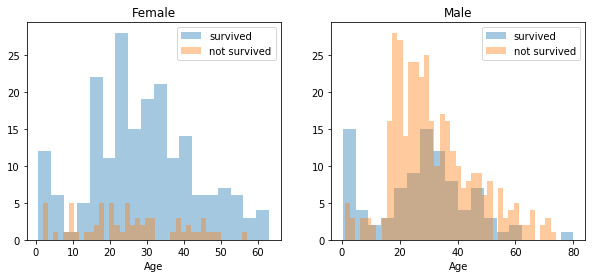

In [67]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

Since there seem to be certain ages, which have increased odds of survival and because I want every feature to be roughly on the same scale, I will create age groups later on.

C:\Users\SONIYA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


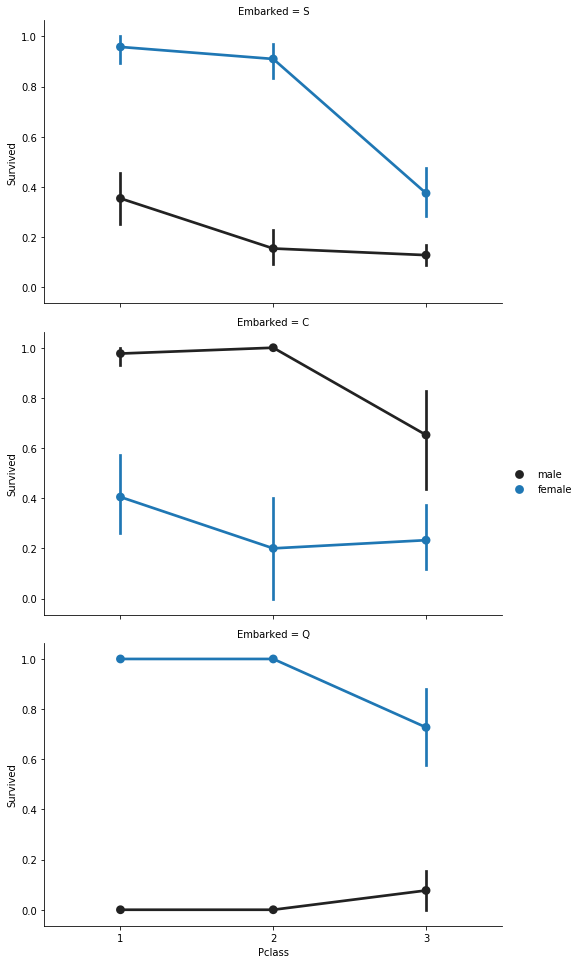

In [68]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Embarked seems to be correlated with survival, depending on the gender.

Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

Pclass also seems to be correlated with survival. We will generate another plot of it below.

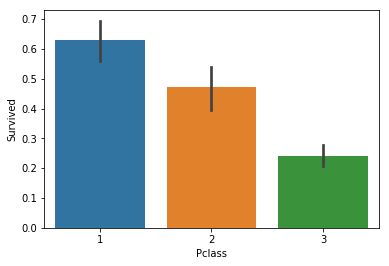

In [69]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.

### Data Preprocessing 

In [70]:
# printing the column names 
train_df.columns.values
# TODO

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [71]:
# lets just drop the feature we dont need 
# TODO Drop the 'PassengerId','Cabin' , 'Name' , 'Ticket' columns 
train_df=train_df.drop(['PassengerId','Cabin',"Name","Ticket"],axis=1)
train_df.head()
# TODO

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


 This leaves us with Age and Embarked to deal with   
 We can either drop the rows with values missing   
 We can fill in appropriate values using stastics  

#### Filling in missing age values with the mean age

In [72]:
# TODO Read about is null from pandas documentation

mean = train_df["Age"].mean()
std = train_df["Age"].std()
is_null = train_df["Age"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
# fill NaN values in Age column with random values generated
age_slice = train_df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
train_df["Age"] = age_slice

#type casting the data type to int
train_df["Age"] = train_df["Age"].astype(int)

# Finding the no of nulls remianing 
train_df["Age"].isnull().sum()
## Yay no more null values for age

0

#### Embarked
Since the Embarked feature has only 2 missing values, we will just drop these rows from the dataset

In [73]:
# Drop missing values from the train set.
train_df.dropna(axis=0,inplace=True)
# TODO
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [74]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null int32
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 59.0+ KB


#### 'SibSp' and 'Parch'
Combine these to form a single family feature 
- Family contains Contains the no of family members onboard

In [75]:
train_df['Family']=train_df['SibSp'] + train_df['Parch']
train_df = train_df.drop(["SibSp","Parch"], axis=1)

In [76]:
# Categorical values need to be transformed into numeric.

## You can do this using the label encoder of scikit learn
"""
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
train_df['Sex']=lb.fit_transform(train_df['Sex'])
train_df['Embarked']=lb.fit_transform(train_df['Embarked'])

"""


train_df['Sex'] = train_df['Sex'].replace(["female", "male"], [0, 1])
train_df['Embarked'] = train_df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])

train_df.head()



,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22,7.2500,1,1
1,1,1,0,38,71.2833,2,1
2,1,3,0,26,7.9250,1,0
3,1,1,0,35,53.1000,1,1
4,0,3,1,35,8.0500,1,0


### This should be good enough 
> Some things I would still do 
- For continious variables remove the outliers and scale them from 0-1 using min-max scalor 


### Test - Train Split 

### Lets train the model finally 

In [77]:
from sklearn.model_selection import train_test_split

# Extracting our target variable 
train_y = train_df["Survived"]
# Dropping it fro the training set
train_x = train_df.drop(["Survived"], axis=1)

# Implement test train split 
X_train, X_test, y_train, y_test =train_test_split(train_x,train_y,test_size=0.2,random_state=5) # TODO

In [78]:
# TODO
# Import GaussianNB and fit a classifier on it
from sklearn.naive_bayes import GaussianNB
# name the classifier as clf for continiation
clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Whats the acuraccy?


In [80]:
from sklearn.metrics import accuracy_score

# predicting outout for 
preds_train = clf.predict(X_train)
preds_test= clf.predict(X_test)

train_acc = accuracy_score(y_train, preds_train)
test_acc = accuracy_score(y_test, preds_test)

print ("Training acuraccy as " , train_acc)
print ("Testing Acuraccy is " , test_acc)

Training acuraccy as  0.7918424753867792
Testing Acuraccy is  0.8258426966292135


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. 